In [21]:
import numpy as np
import pandas as pd
import os
from PIL import Image

def label_array(row):
    return (np.asarray(Image.open(os.path.join('images',row['image-name'])))/255).astype('float32')

data = pd.read_csv("data.csv")
data['image-array'] = data.apply(lambda row: label_array(row), axis=1)
data['label'] -= 1

In [22]:
data

,image-name,label,label-name,image-array
0,1.jpg,37,bonus-winter,"[[[0.7254902, 0.7176471, 0.65882355], [0.70196..."
1,2.jpg,25,characters-8,"[[[0.30980393, 0.18039216, 0.15294118], [0.207..."
2,3.jpg,8,dots-9,"[[[0.69411767, 0.6392157, 0.6039216], [0.72156..."
3,4.jpg,35,bonus-summer,"[[[0.32941177, 0.27450982, 0.22352941], [0.521..."
4,5.jpg,27,honors-east,"[[[0.8235294, 0.7764706, 0.72156864], [0.82352..."
...,...,...,...,...
624,624.jpg,10,bamboo-2,"[[[0.30980393, 0.32941177, 0.23921569], [0.298..."
625,625.jpg,1,dots-2,"[[[0.9882353, 1.0, 1.0], [0.9843137, 1.0, 1.0]..."
626,626.jpg,18,characters-1,"[[[0.94509804, 0.94509804, 0.94509804], [0.945..."
627,627.jpg,9,bamboo-1,"[[[1.0, 1.0, 0.9843137], [0.99215686, 0.996078..."


In [24]:
def rgb_to_grayscale(row):
    return (np.sum(row['image-array'], axis = 2)/3)

data['image-array-gr'] = data.apply(lambda row: rgb_to_grayscale(row), axis=1)

In [35]:
data['label-name'].value_counts()

dots-1                 22
bamboo-1               17
bamboo-4               16
bamboo-6               16
bamboo-7               16
bamboo-5               16
dots-7                 16
honors-north           16
dots-5                 16
bamboo-3               16
honors-white           16
characters-9           16
bamboo-9               16
characters-4           16
dots-2                 16
characters-1           16
dots-4                 16
characters-8           16
honors-east            16
characters-5           16
bamboo-8               16
honors-south           16
characters-2           16
honors-west            16
dots-3                 16
characters-6           16
dots-6                 16
characters-7           16
characters-3           15
bamboo-2               15
dots-9                 15
dots-8                 15
honors-green           13
honors-red             13
bonus-winter           12
bonus-summer           12
bonus-autumn           12
bonus-spring           12
bonus-bamboo

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)


X_train = np.stack(train_set['image-array-gr'].values)
y_train = np.stack(train_set['label'].values)


n_clf = KNeighborsClassifier(1)
n_clf.fit(X_train,y_train)


X_test = np.stack(test_set['image-array-gr'].values)
y_test = np.stack(test_set['label'].values)

print(n_clf.score(X_test,y_test))
print(cross_val_score(n_clf, X_train, y_train, cv=3, scoring="accuracy"))

0.4603174603174603
[0.42261905 0.42261905 0.46107784]


In [29]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train,y_train)
print(cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy"))

[0.45833333 0.44642857 0.47305389]


In [4]:
np.shape(data['image-array-gr'][0])

(320, 240)

In [4]:
import tensorflow as tf
from tensorflow import keras

In [25]:
from sklearn.model_selection import train_test_split
model = keras.models.Sequential()

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

X_train = np.stack(train_set['image-array-gr'].values)
y_train = np.stack(train_set['label'].values)



model.add(keras.layers.Flatten(input_shape=[320, 240]))
#model.add(keras.layers.Dense(20, activation="relu"))
#model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(42, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])



history = model.fit(X_train, y_train, epochs=100,validation_split = 0.1,batch_size=42)

Epoch 1/100
11/11 [==============================] - 1s 55ms/step - loss: 57.3943 - accuracy: 0.0420 - val_loss: 80.8989 - val_accuracy: 0.0392
Epoch 2/100
11/11 [==============================] - 0s 33ms/step - loss: 154.9059 - accuracy: 0.0265 - val_loss: 158.4506 - val_accuracy: 0.0784
Epoch 3/100
11/11 [==============================] - 0s 18ms/step - loss: 194.1074 - accuracy: 0.0332 - val_loss: 196.5201 - val_accuracy: 0.0392
Epoch 4/100
11/11 [==============================] - 0s 19ms/step - loss: 205.3399 - accuracy: 0.0465 - val_loss: 196.2606 - val_accuracy: 0.0588
Epoch 5/100
11/11 [==============================] - 0s 21ms/step - loss: 167.1634 - accuracy: 0.0509 - val_loss: 173.2176 - val_accuracy: 0.0392
Epoch 6/100
11/11 [==============================] - 0s 18ms/step - loss: 141.7713 - accuracy: 0.0531 - val_loss: 125.0221 - val_accuracy: 0.0784
Epoch 7/100
11/11 [==============================] - 0s 18ms/step - loss: 123.6527 - accuracy: 0.0686 - val_loss: 160.0690 - v

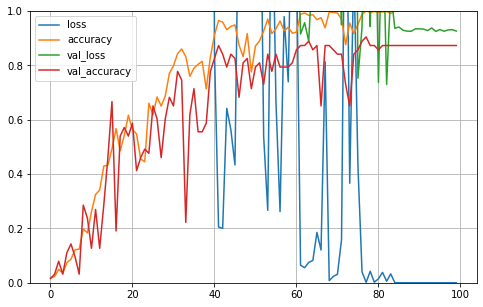

In [42]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()



In [33]:
np.shape(X_train)

(629, 320, 240)

In [7]:
X_test = np.stack(test_set['image-array-gr'].values)
y_test = np.stack(test_set['label'].values)

model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 18ms/step - loss: 3.0029 - accuracy: 0.6746


[3.0029196739196777, 0.6746031641960144]

In [34]:
im = (np.asarray(Image.open('37.jpg'))/255).astype('float32')
im = np.sum(im,axis=2)/3
#np.shape(im)
model.predict(np.array([im]))
#model.predict_classes(np.array([im]))
#print(np.shape(im))
#data['image-array-gr'][0]

array([[1.48539459e-09, 6.35928312e-20, 2.36673259e-09, 8.60770797e-08,
        5.90837444e-04, 7.78214908e-14, 2.02051220e-09, 5.07956455e-10,
        1.78397002e-07, 9.03962629e-08, 2.75833131e-29, 2.29765507e-13,
        1.54053909e-04, 9.99088526e-01, 2.64704028e-07, 1.29517022e-11,
        5.04220623e-07, 1.23848149e-04, 9.58235697e-19, 1.24263585e-16,
        5.44579849e-20, 6.51210397e-19, 4.01981731e-20, 3.00507549e-24,
        4.56685186e-25, 1.40195549e-14, 2.60988424e-20, 1.67053820e-14,
        1.55710389e-14, 6.18888404e-13, 1.30671545e-08, 3.76232924e-16,
        1.90838217e-14, 9.46512137e-06, 9.75775016e-09, 3.52193209e-12,
        5.40443579e-10, 5.24487676e-10, 3.10768411e-09, 4.52746152e-09,
        3.97580095e-07, 3.19051433e-05]], dtype=float32)